In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mobile_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/train.csv')

mobile_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


In [ ]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Univariate analysis

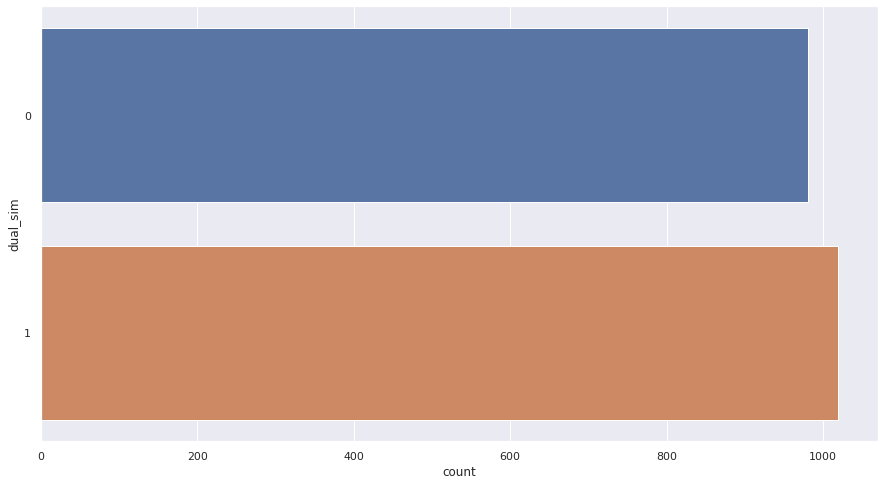

In [ ]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(y = mobile_train['dual_sim'])
plt.show()

The above chart implies that there are more dual sim phones sold in the market

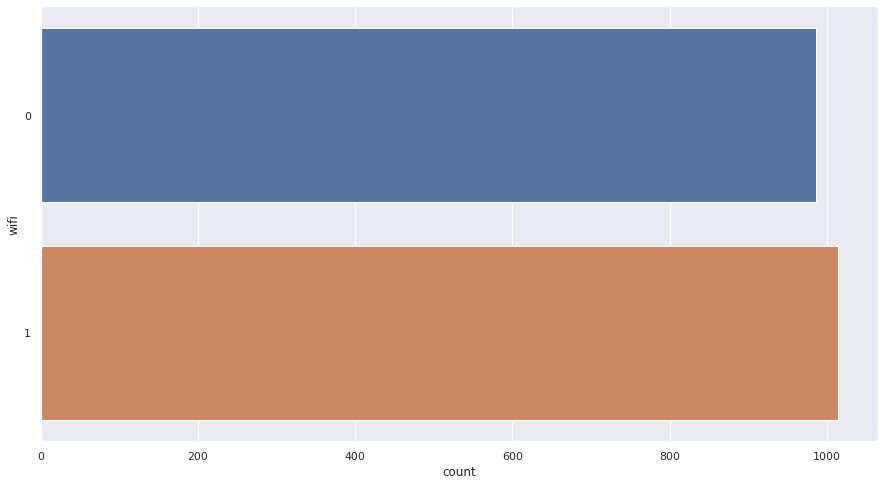

In [ ]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(y = mobile_train['wifi'])
plt.show()

The above chart implies that there are more wifi phones sold in the market

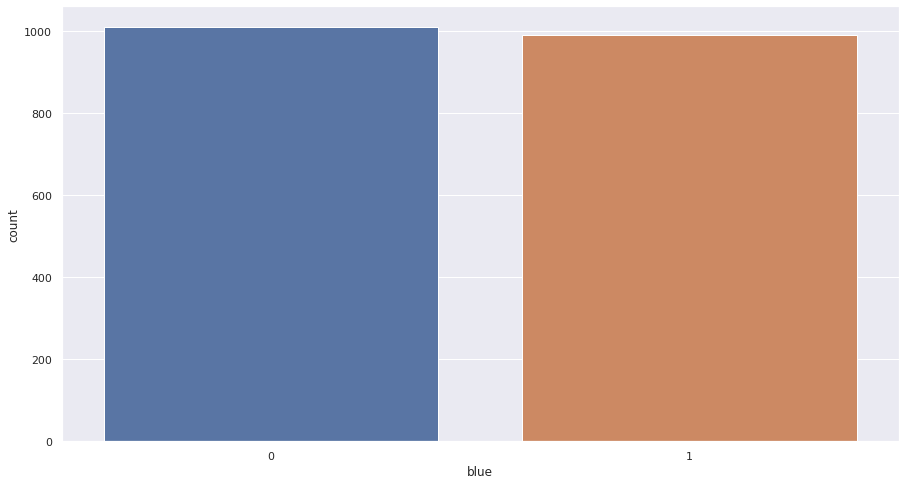

In [ ]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.countplot(x = mobile_train['blue'])
plt.show()

The above chart implies that phones without bluetooth are sold more in the market

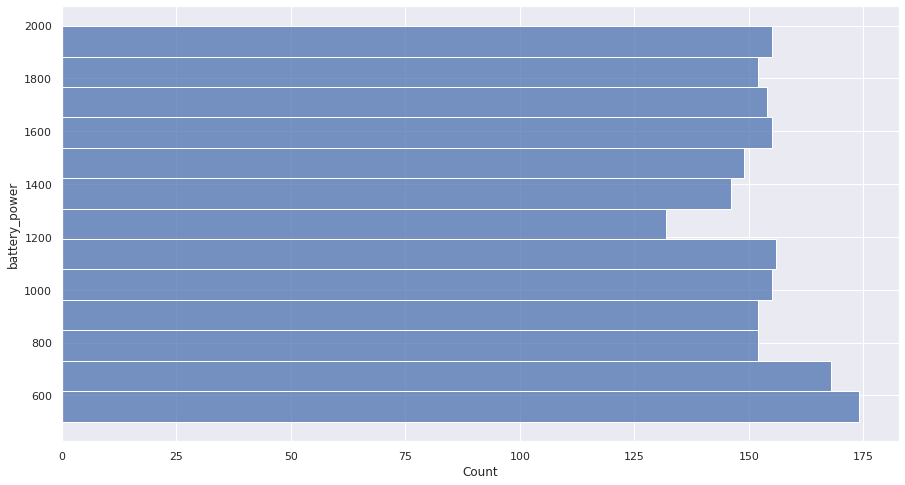

In [ ]:
plt.figure(figsize = (15,8)) #showing width and height ; 15 is width, 8 is height
sns.set(style = 'darkgrid')
sns.histplot(y = mobile_train['battery_power'])
plt.show()

The above implies that phones with weaker battery lives are sold more than phones with longer battery lives

## Bivariate analysis

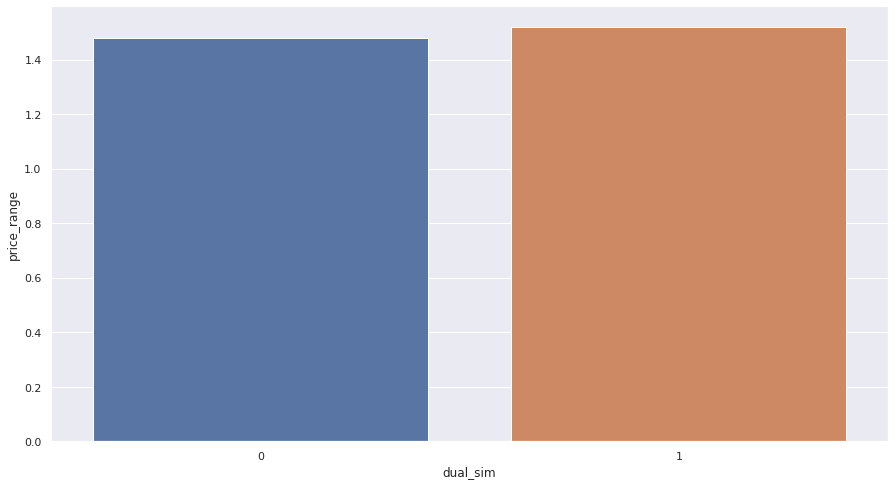

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = mobile_train['dual_sim'],ci=0)
plt.show()

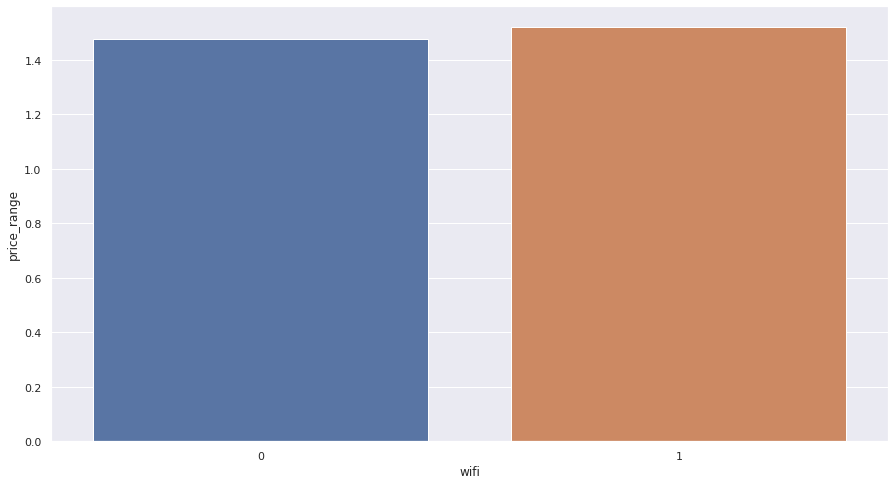

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = mobile_train['wifi'],ci=0)
plt.show()

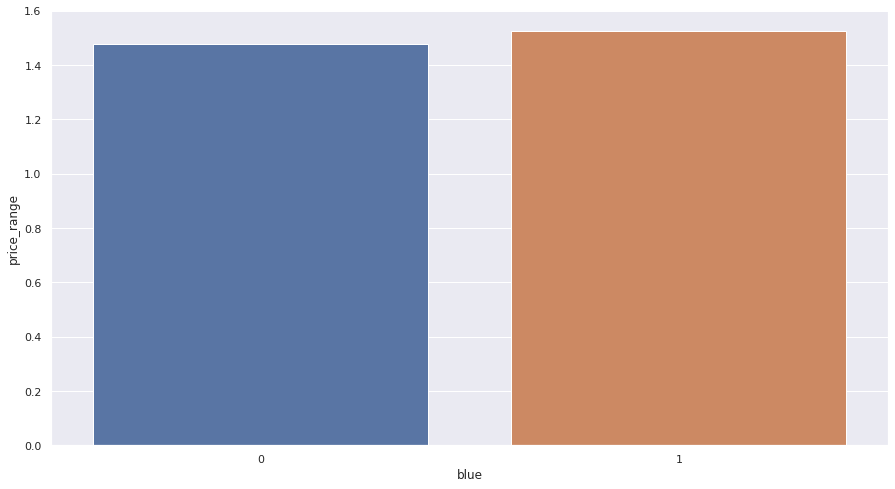

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = mobile_train['blue'],ci=0)
plt.show()

The above charts imply that phones with dual_sim, bluetooth and wifi are more expensive than phones without.

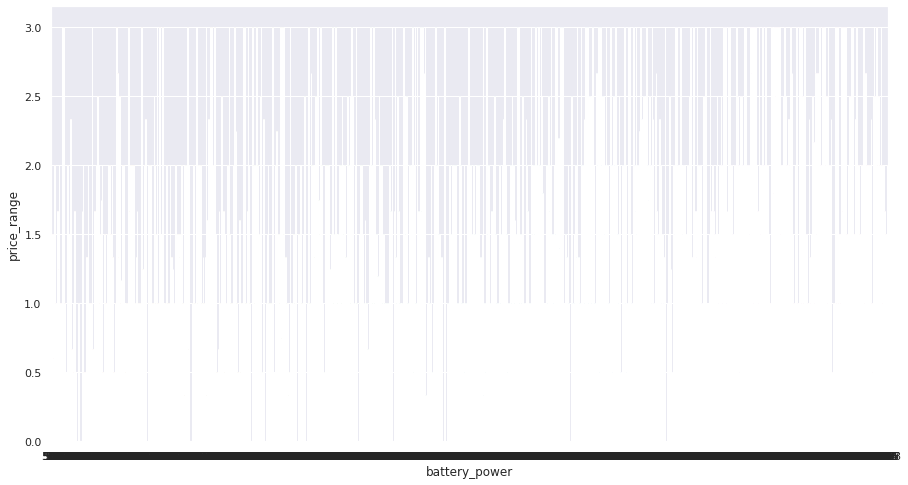

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
sns.barplot(y = mobile_train['price_range'], x = mobile_train['battery_power'],ci=0)
plt.show()

## Multivariate analysis

<AxesSubplot:>

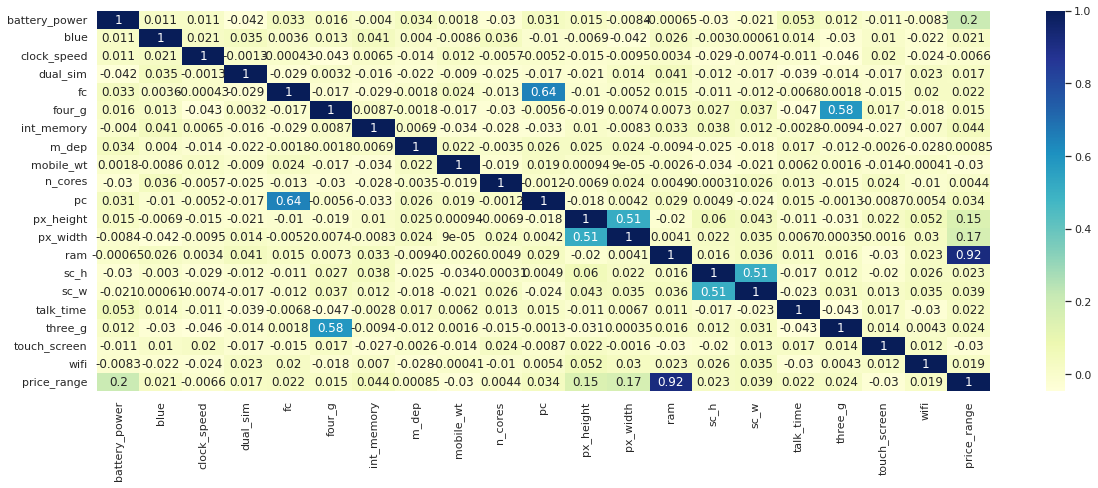

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(mobile_train.corr(),cmap='YlGnBu',annot=True)

## Modelling using logistic regression

1. Assign your x and y variables

In [ ]:
x = mobile_train.drop(['price_range'], axis = 1)
y = mobile_train.price_range

In [ ]:
x.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0


2. Standardize the dataset, using standardscaler

In [ ]:
from sklearn.preprocessing import StandardScaler # ................................ Import the scaler from sklearn library
scaler = StandardScaler() # ....................................................... instantiate the scaler and save it to a variable name
mt_scaled = pd.DataFrame() # .................................................... Create a dataframe to contain the scaled features
for i in x.columns: # ........................................................... Loop through all the columns in x
  mt_scaled[[i]] = scaler.fit_transform(x[[i]]) # ...................... Scale them and save them sd columns in the alrerady prerpared dataframe

mt_scaled.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099


3. Create model by splittin data set into test and train sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.15, random_state = 30, stratify = y)
print(f"X Train rows and column: {x_train.shape}")
print(f"Y Train rows and column: {y_train.shape}")
print(f"X Test rows and column: {x_test.shape}")
print(f"Y Test rows and column: {y_test.shape}")

X Train rows and column: (1700, 20)
Y Train rows and column: (1700,)
X Test rows and column: (300, 20)
Y Test rows and column: (300,)


In [ ]:
train = pd.concat([x_train, y_train], axis = 1) # ...............................Join the x and y train dataset together
print('train dataframe: ',train.shape)
test = pd.concat([x_test, y_test], axis = 1) #...................................Join the x and y test dataset together
print('test dataframe: ',test.shape)

train dataframe:  (1700, 21)
test dataframe:  (300, 21)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
717,1397,0,2.4,1,5,1,3,0.2,121,3,15,433,1658,1378,18,15,4,1,1,1,1
124,1166,0,2.0,0,3,1,25,0.8,198,5,4,59,1203,2488,13,5,15,1,0,0,2
1752,1938,1,0.5,1,5,0,44,0.5,121,2,9,1299,1935,3497,18,10,18,0,1,0,3


In [ ]:
test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1700,742,1,0.5,0,0,1,36,0.7,139,3,1,1161,1288,292,8,0,6,1,1,1,0
909,868,0,1.7,0,0,0,30,0.8,83,4,0,276,1026,1653,11,7,17,1,0,0,1
844,1986,0,0.5,0,7,0,51,0.4,95,3,9,342,774,3165,5,0,13,1,0,0,3


4. Carry out logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Model Creation
logistic.fit(x_train, y_train)

# Predict the test data for checking accuracy
prediction = logistic.predict(x_test)

In [ ]:
# Checking for the Accuracy of the Model Using Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78        75
           1       0.49      0.49      0.49        75
           2       0.40      0.36      0.38        75
           3       0.70      0.73      0.71        75

    accuracy                           0.60       300
   macro avg       0.59      0.60      0.59       300
weighted avg       0.59      0.60      0.59       300



In [ ]:
# Create a dataframe to show the errors of the predictions

pred_df = pd.DataFrame({'Actual Y Value':y_test,'Predicted Y Value':prediction})
pred_df.replace({1: 'yes', 0: 'no'}, inplace = True)
pred_df.head(3)

,Actual Y Value,Predicted Y Value
1700,no,no
909,yes,2
844,3,3


In [ ]:
logistic.predict([[1397,	0,	2.4,	1,	5,	1,	3,	0.2,	121,	3,	15,	433,	1658,	1378,	18,	15,	4,	1,	1,	1]]) # Train set - 1

array([1])

In [ ]:
logistic.predict([[1986,	0,	0.5,	0,	7,	0,	51,	0.4,	95,	3,	9,	342,	774,	3165,	5,	0,	13,	1,	0,	0]]) # Test set - 3

array([3])

The above logistic regression model appears to estimate the data quite accurately, but the accuracy rate is less than the expected 80%, so we will use another model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

neighbours = 20
scores=[]
for k in range(1, neighbours):
    knn = KNeighborsClassifier(neighbours - k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    print('Accuracy for k=',k,'is: ',round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

print(f"\nTHE BEST RESULT IS = {max(scores)}")

Accuracy for k= 1 is:  0.93
Accuracy for k= 2 is:  0.92
Accuracy for k= 3 is:  0.92
Accuracy for k= 4 is:  0.93
Accuracy for k= 5 is:  0.93
Accuracy for k= 6 is:  0.93
Accuracy for k= 7 is:  0.93
Accuracy for k= 8 is:  0.93
Accuracy for k= 9 is:  0.93
Accuracy for k= 10 is:  0.93
Accuracy for k= 11 is:  0.93
Accuracy for k= 12 is:  0.92
Accuracy for k= 13 is:  0.92
Accuracy for k= 14 is:  0.89
Accuracy for k= 15 is:  0.91
Accuracy for k= 16 is:  0.89
Accuracy for k= 17 is:  0.9
Accuracy for k= 18 is:  0.86
Accuracy for k= 19 is:  0.89

THE BEST RESULT IS = 0.93


              precision    recall  f1-score   support

           0       0.89      0.99      0.94        75
           1       0.93      0.84      0.88        75
           2       0.88      0.92      0.90        75
           3       0.97      0.92      0.95        75

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



<AxesSubplot:>

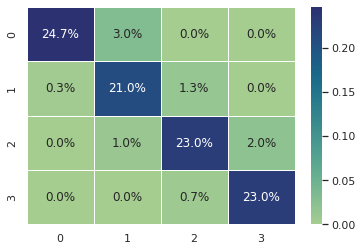

In [ ]:
# Now we use the optimal number of K that gives the best result

knn = KNeighborsClassifier(8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))
revealer = confusion_matrix(y_pred, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

The KNN model has an accuracy rate of 92% with price_range 0 mostly correctly predicted, followed by price_range 3, 2 then 1.